<h1>Data Cleaning</h1>

1) Missing Data - (Delete, Fill)
2) Standardizing Data Format (Same format)
3) Filter unwanted outliers
4) Handling Duplicates

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import os 
os.chdir(r'D:\STUDY\SKILLS\POWERBI PROJECTS\LEARNING\DATASETS')

In [25]:
dataset=pd.read_csv('honda_car_selling.csv')

In [26]:
dataset.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [28]:
dataset.shape

(999, 6)

In [29]:
#finding percentages of data missing in every column
dataset.isnull().sum()/dataset.shape[0]*100 

Year          0.0
kms Driven    0.0
Fuel Type     0.0
Suspension    0.0
Price         0.0
Car Model     0.0
dtype: float64

In [30]:
#removing all the null values inplace=true as we have to make changes with the original file
dataset.dropna(inplace=True) 

<h2>Car Model</h2>

In [31]:
def model_name(x):
    return x[x.index(" ")+1:]

In [32]:
dataset["Model Name"]=dataset["Car Model"].apply(model_name)

<h2>Price</h2>

In [33]:
dataset["Price"]=dataset["Price"].str.replace(",","")

In [34]:
def rupees_conv(x):
    p=x.split(" ")
    try:
        if p[2]=="Lakh":
            return str(round(float(p[1])*100000,1))
        elif p[2]=="Crore":
            return str(round(float(p[1])*10000000,1))
    except:
        return x

In [35]:
dataset["Price"]=dataset["Price"].apply(rupees_conv)

In [36]:
dataset["Price"]=dataset["Price"].astype("float")

<h2>KM Driven</h2>

In [37]:
dataset["kms Driven"]=dataset["kms Driven"].str.replace(",","")

In [38]:
def kms(t):
    return t[:t.index(" ")]

In [39]:
dataset["kms Driven"]=dataset["kms Driven"].apply(kms)

In [40]:
dataset["kms Driven"]=dataset["kms Driven"].astype("float")

<h2>Bonus</h2>

to datetime format 
pd.to_datetime(dataset['column_name'])

In [41]:
dataset.head(3)

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model,Model Name
0,2019,19006.0,Petrol,Automatic,929000.0,Honda City V CVT,City V CVT
1,2021,11936.0,Petrol,Automatic,1395000.0,Honda City ZX CVT,City ZX CVT
2,2018,29635.0,Petrol,Automatic,995000.0,Honda City i-VTEC CVT ZX,City i-VTEC CVT ZX


In [42]:
dataset["Model Name"].value_counts()/dataset.shape[0]*100

Model Name
City 1.5 S MT          4.704705
City i VTEC V          3.803804
Amaze S i-Dtech        3.503504
Brio S MT              3.303303
City V MT              2.602603
                         ...   
Amaze S Diesel BSIV    0.100100
Amaze VX CVT Diesel    0.100100
CR-V 2.0 2WD           0.100100
City 1.5 V MT Sunro    0.100100
WR-V VX Diesel         0.100100
Name: count, Length: 183, dtype: float64

 <h1>Data Visualization</h1>

In [43]:
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)

C:\Users\DEV\AppData\Local\Temp\ipykernel_21780\2444094893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


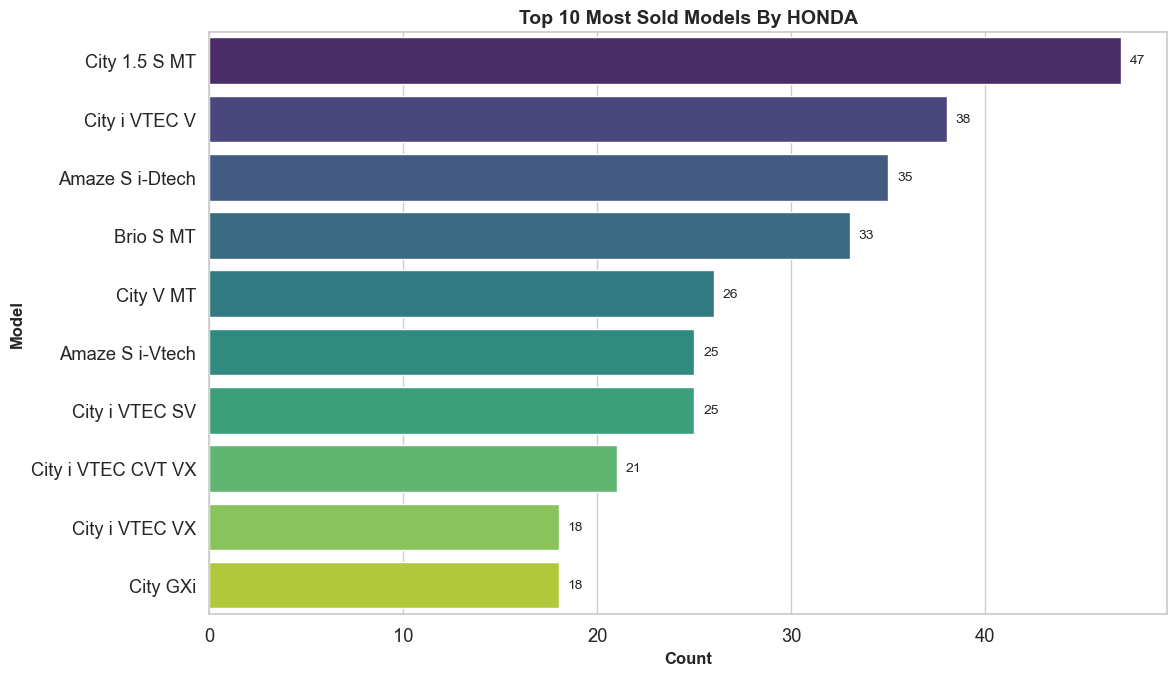

In [44]:
top_10=dataset["Model Name"].value_counts().head(10)

data=pd.DataFrame({
    'Model':top_10.index,
    'Count':top_10.values
})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))


sns.barplot(
    x='Count',
    y='Model',
    data=data,
    palette='viridis',
)

plt.xlabel('Count',fontsize=12,weight='bold')
plt.ylabel('Model',fontsize=12,weight='bold')
plt.title('Top 10 Most Sold Models By HONDA', fontsize=14, weight='bold')

for index, row in data.iterrows():
    plt.text(row['Count']+0.47,index, str(row['Count']), va='center', fontsize=10)

plt.tight_layout()
plt.show()

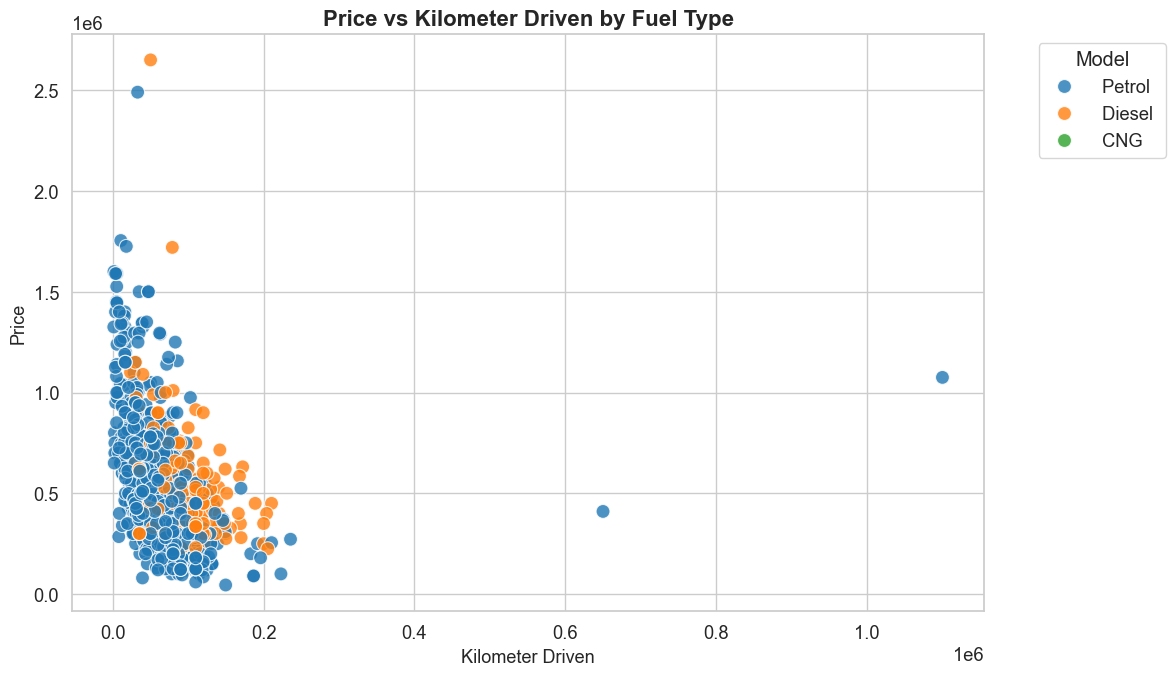

In [45]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=dataset,
    x='kms Driven',
    y='Price',
    hue='Fuel Type',
    palette='tab10',
    alpha=0.8,
    edgecolor='w',
    s=100
)
plt.title('Price vs Kilometer Driven by Fuel Type',fontsize=16,weight='bold')
plt.xlabel('Kilometer Driven',fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',title='Model')
plt.tight_layout()
plt.show()

C:\Users\DEV\AppData\Local\Temp\ipykernel_21780\2835137224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


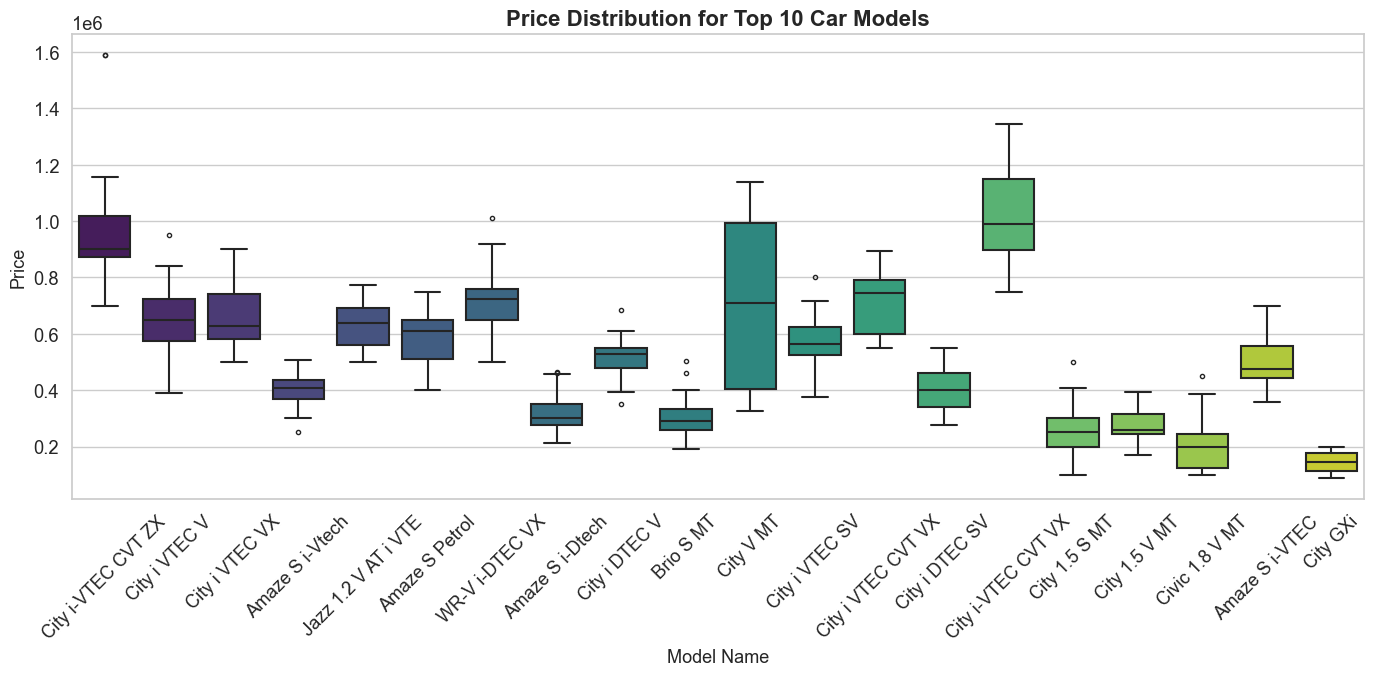

In [46]:
plt.figure(figsize=(14, 7))
top_models = dataset['Model Name'].value_counts().head(20).index
dataset_top = dataset[dataset['Model Name'].isin(top_models)]
sns.boxplot(
    data=dataset_top,
    x='Model Name',
    y='Price',
    palette='viridis',
    linewidth=1.5,
    fliersize=3
)
plt.xticks(rotation=45)
plt.title('Price Distribution for Top 10 Car Models', fontsize=16, weight='bold')
plt.xlabel('Model Name', fontsize=13)
plt.ylabel('Price', fontsize=13)
plt.tight_layout()
plt.show()

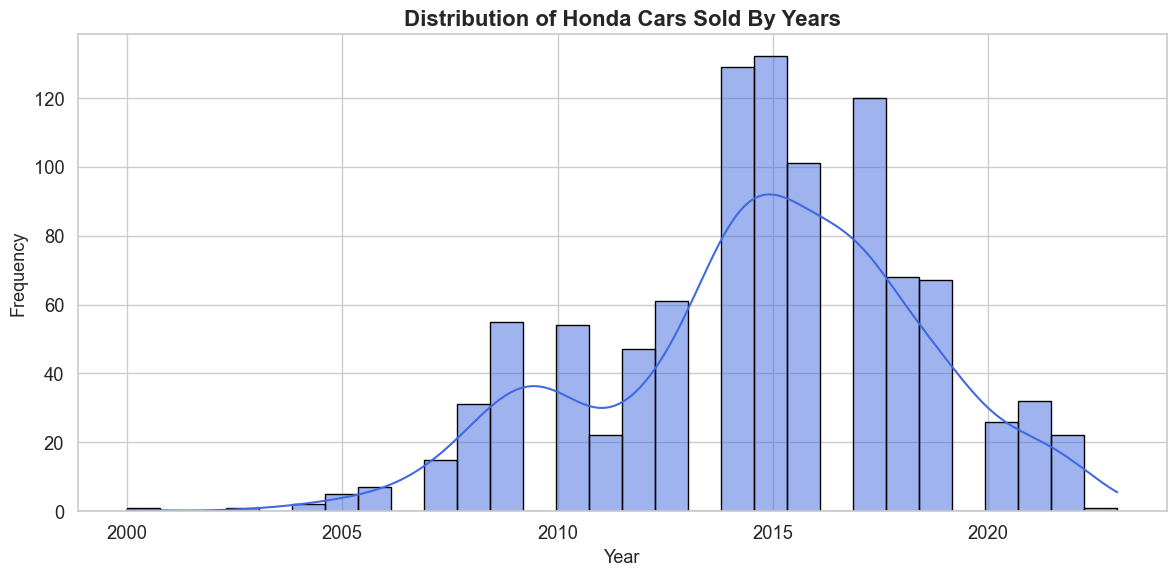

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(
    dataset['Year'],
    bins=30,
    kde=True,
    color='royalblue',
    edgecolor='black'
)
plt.title('Distribution of Honda Cars Sold By Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.tight_layout()
plt.show()

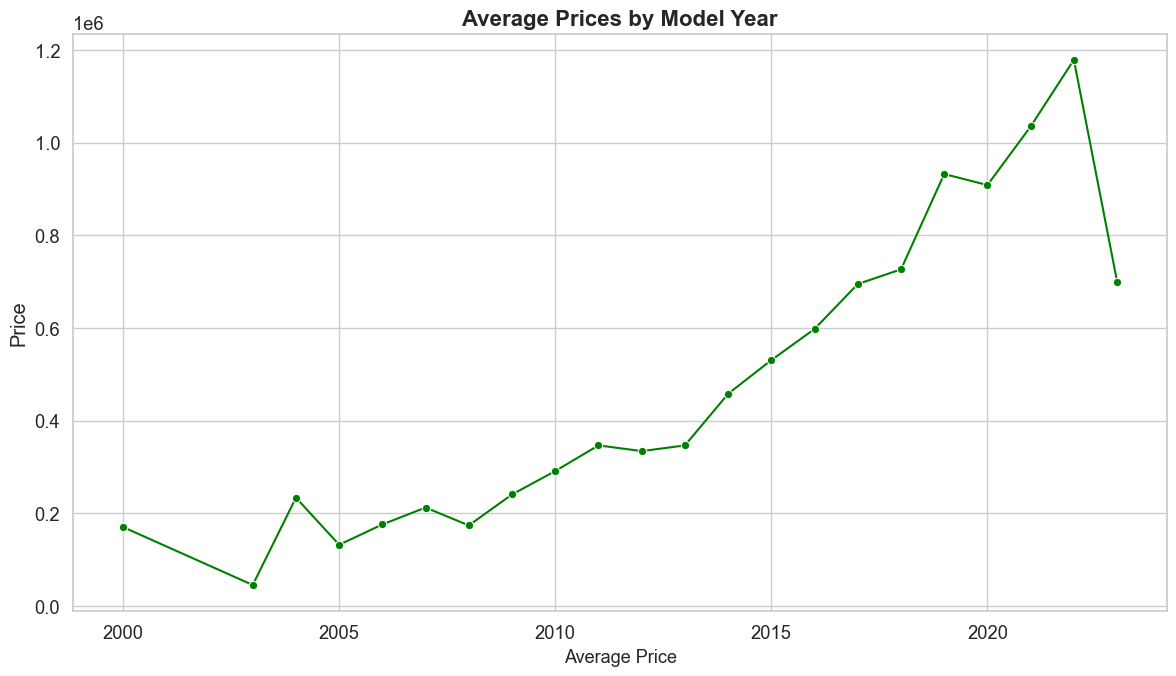

In [48]:
yr_driven=dataset.groupby("Year")["Price"].mean().reset_index()
plt.figure(figsize=(12,7))
sns.lineplot(x='Year',y='Price',data=yr_driven,marker='o',color='green')
plt.title('Average Prices by Model Year',fontsize=16,weight='bold')
plt.xlabel('Model Year',fontsize=13)
plt.xlabel('Average Price',fontsize=13)
plt.tight_layout()
plt.show()

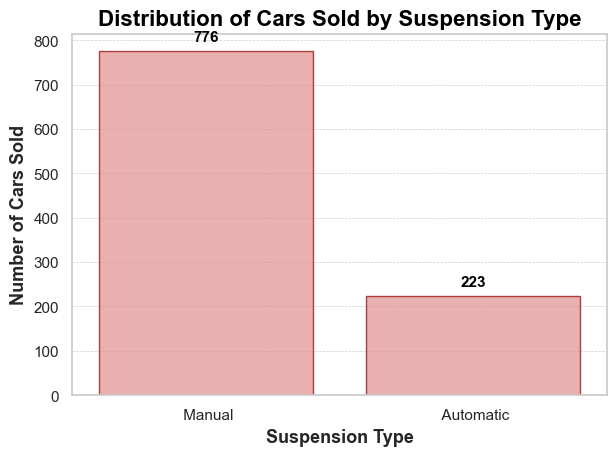

In [49]:
ma=dataset["Suspension"].value_counts()

df=pd.DataFrame({
    'Suspension':ma.index,
    'Count':ma.values
})

bars = sns.barplot(
    x='Suspension',
    y='Count',
    data=df,
    color='lightcoral',
    alpha=0.7,
    edgecolor='darkred'
)

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(df['Count']) * 0.02,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

plt.xlabel('Suspension Type', fontsize=13, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=13, fontweight='bold')
plt.title('Distribution of Cars Sold by Suspension Type', fontsize=16, fontweight='bold', color='black')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


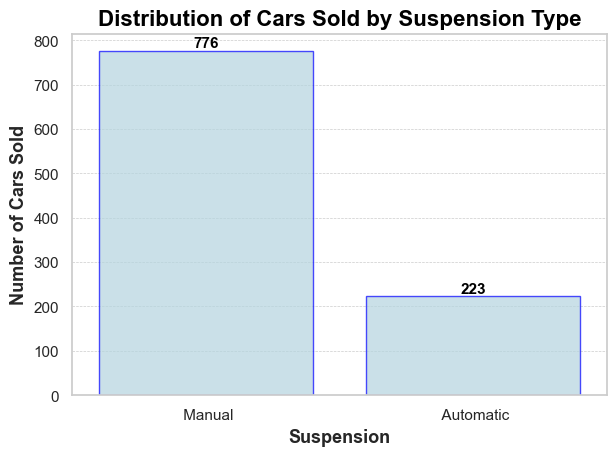

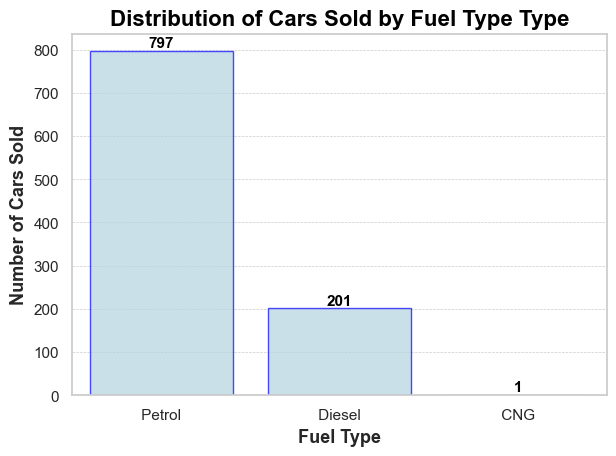

In [50]:
l=["Suspension","Fuel Type"]
for i in l:
    print("\n")
    ma=dataset[i].value_counts()
    df=pd.DataFrame({
        i:ma.index,
        'Count':ma.values
    })

    bars = sns.barplot(
        x=i,
        y='Count',
        data=df,
        color='lightblue',
        alpha=0.7,
        edgecolor='blue'
    )

    for bar in bars.patches:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(df['Count']) * 0.001,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold',
            color='black'
        )

    plt.xlabel(i, fontsize=13, fontweight='bold')
    plt.ylabel('Number of Cars Sold', fontsize=13, fontweight='bold')
    plt.title(f'Distribution of Cars Sold by {i} Type', fontsize=16, fontweight='bold', color='black')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


    

In [51]:
dataset.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model,Model Name
0,2019,19006.0,Petrol,Automatic,929000.0,Honda City V CVT,City V CVT
1,2021,11936.0,Petrol,Automatic,1395000.0,Honda City ZX CVT,City ZX CVT
2,2018,29635.0,Petrol,Automatic,995000.0,Honda City i-VTEC CVT ZX,City i-VTEC CVT ZX
3,2020,16163.0,Petrol,Automatic,1326000.0,Honda City ZX CVT,City ZX CVT
4,2015,105114.0,Petrol,Manual,568000.0,Honda City i VTEC V,City i VTEC V
